In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
quandl.ApiConfig.api_key = 'YFAUpY48eQgtES3tXC5G'
data = quandl.get('FRED/NROU')

In [3]:
data.head()

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [4]:
data.tail()

,Value
Date,
2030-10-01,4.294982
2031-01-01,4.289282
2031-04-01,4.283630
2031-07-01,4.278029
2031-10-01,4.272470


In [5]:
data.shape

(332, 1)

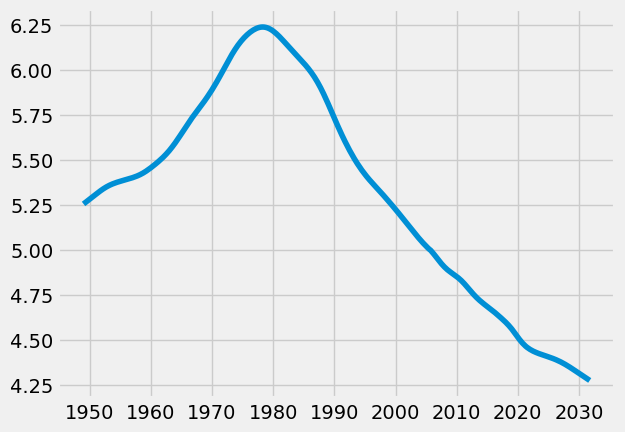

In [6]:
plt.plot(data)

In [7]:
data_2 = data.reset_index()

In [8]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [9]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'], axis=1, inplace=True) 
data_sub.head()

,Value
datetime,
1980-01-01,6.217371
1980-04-01,6.210709
1980-07-01,6.203388
1980-10-01,6.195496
1981-01-01,6.187123


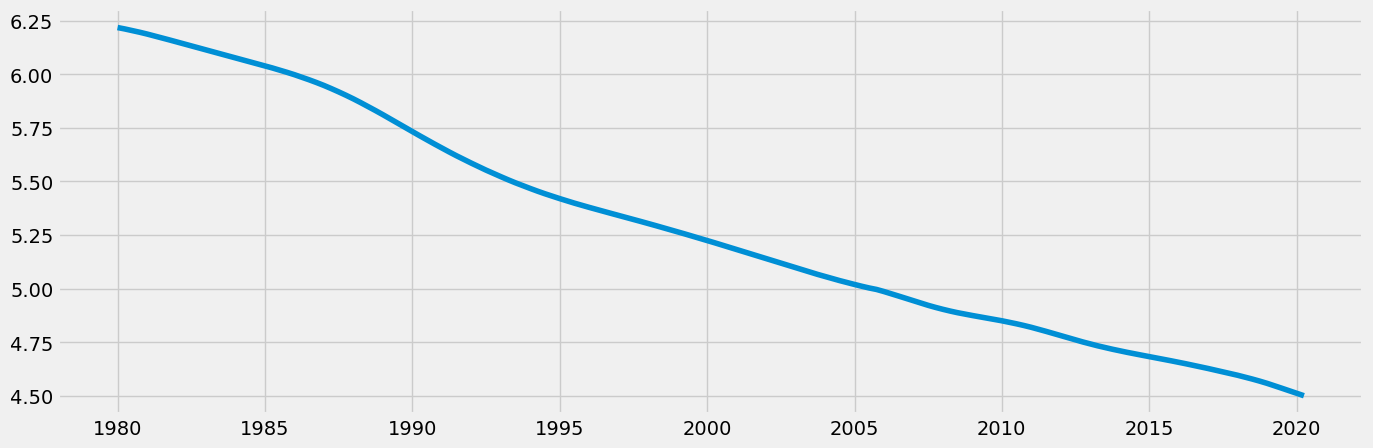

In [10]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [13]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [14]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

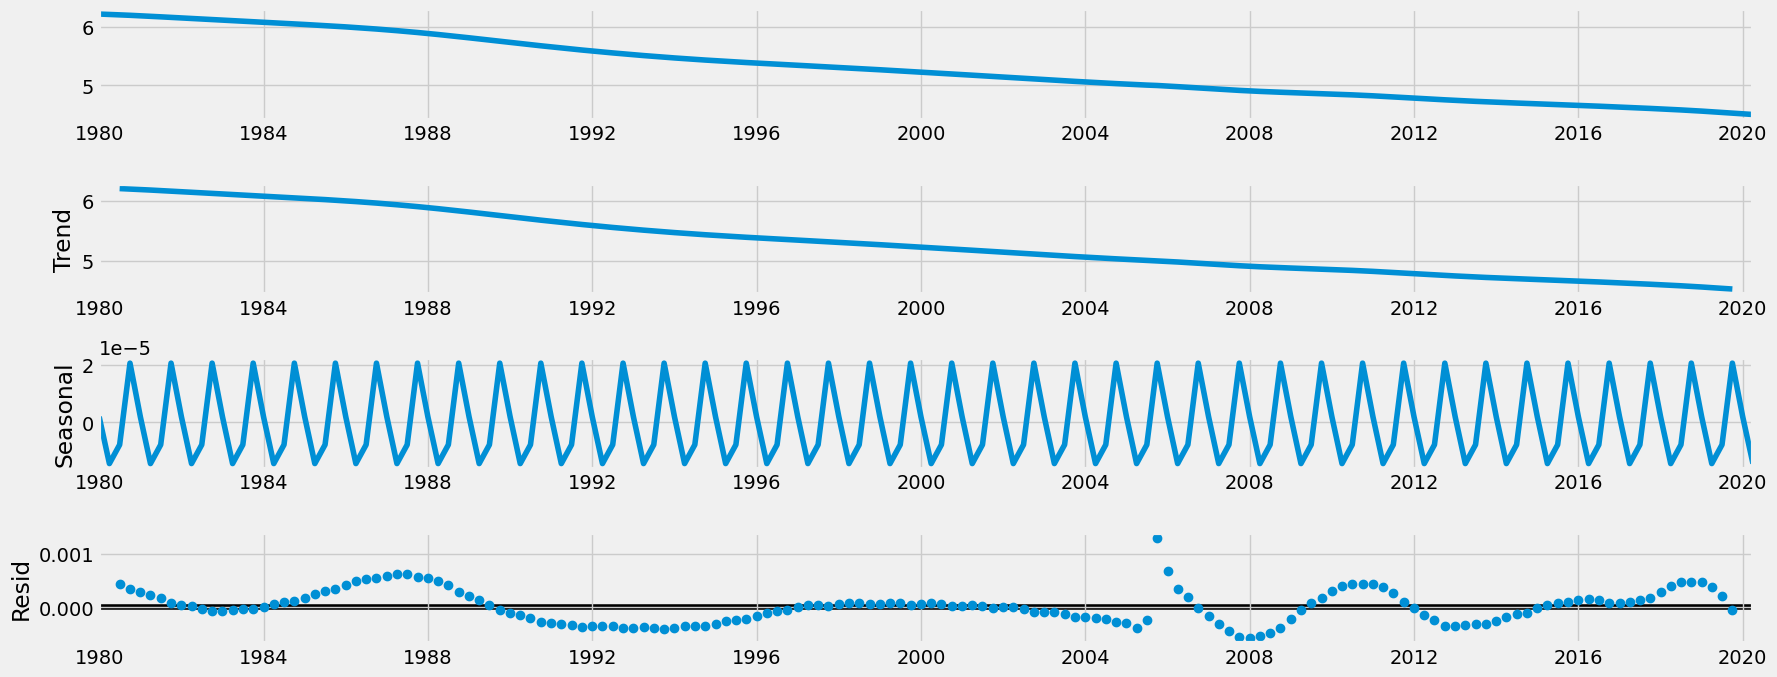

In [15]:
decomposition.plot()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
   
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.745331
p-value                          0.407921
Number of Lags Used              4.000000
Number of Observations Used    157.000000
Critical Value (1%)             -3.472703
Critical Value (5%)             -2.880132
Critical Value (10%)            -2.576683
dtype: float64


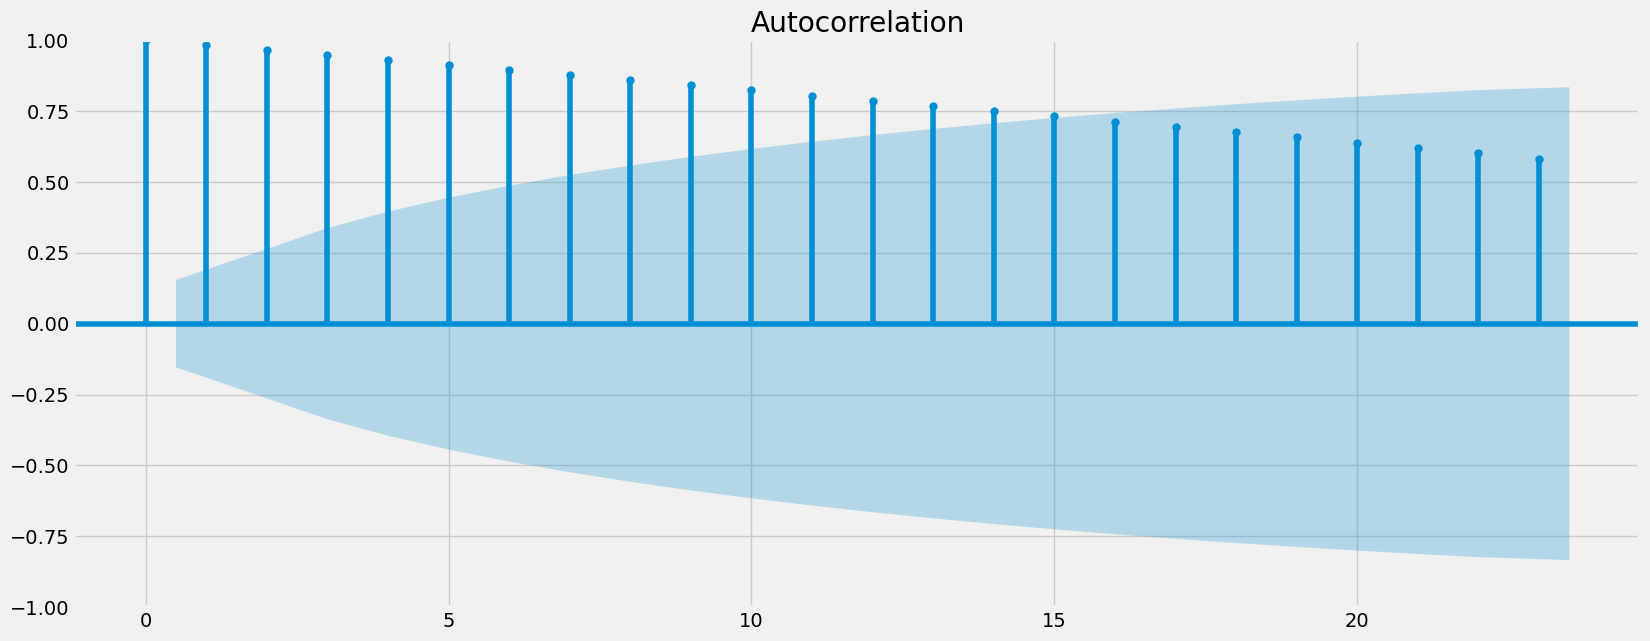

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub)
plt.show()

In [18]:
data_diff = data_sub - data_sub.shift(1)

In [19]:
data_diff.dropna(inplace = True)

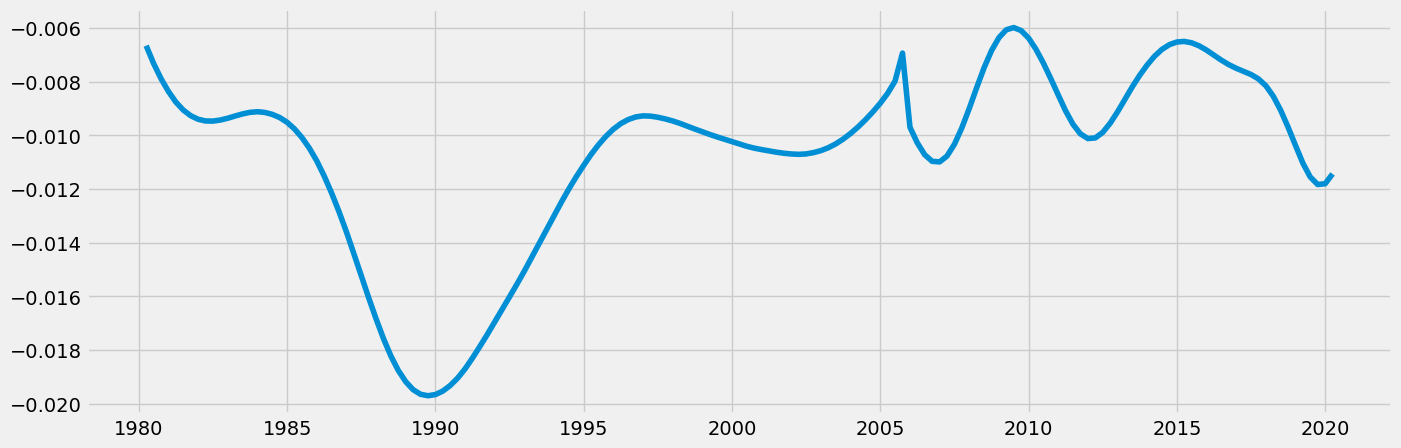

In [20]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [21]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.451840
p-value                          0.127636
Number of Lags Used              2.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


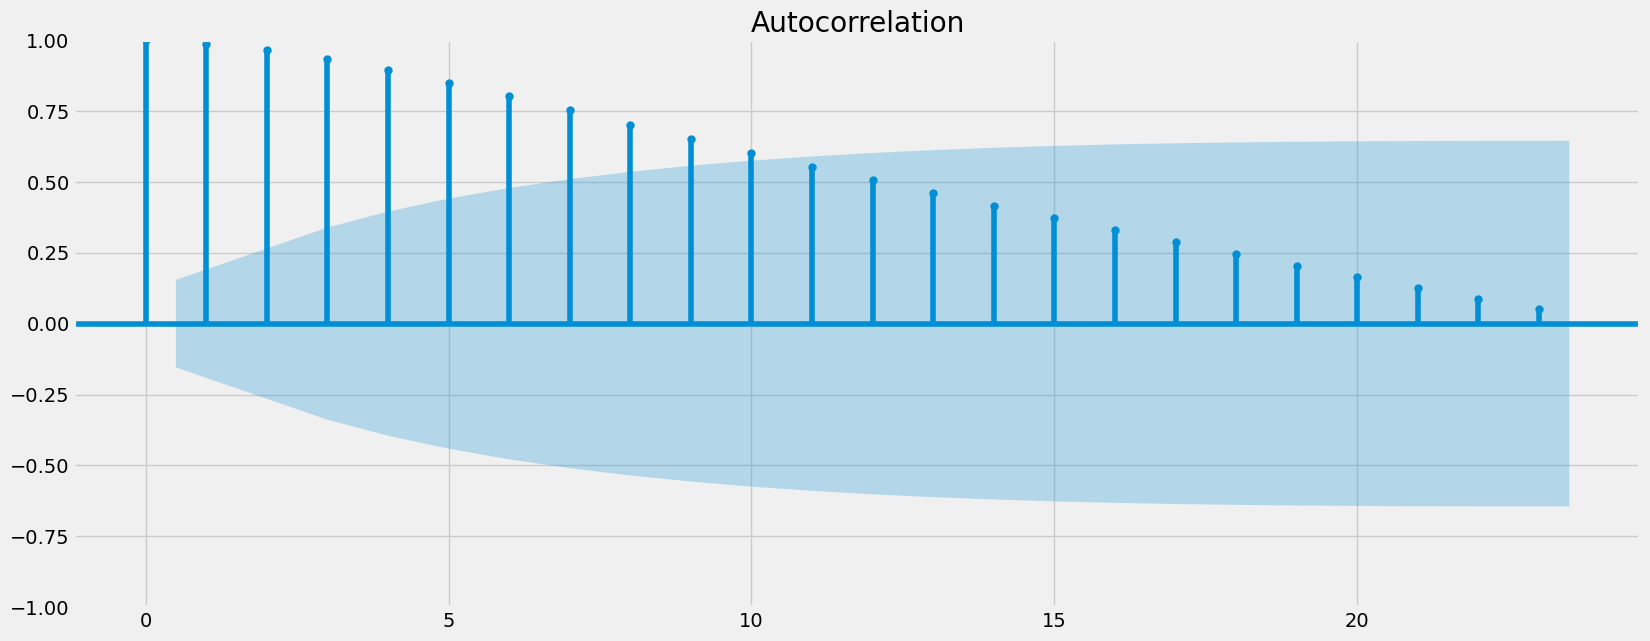

In [22]:
plot_acf(data_diff)
plt.show()